### Analisi descrittiva dei dati 

<p>

<br> 1. Sostituzione dei valori anomali. Valutare più scenari: senza considerare i valori anomali? 
In questa analisi i valori anomali sono stati sostituiti con l'ultimo valore conosciuto prima della presentazione del valore anomalo <br />

<br> 2. Formattazione della data e aggiunta di ulteriori features  <br />

<br> 3. Aggregazione dei valori per data e cella e relative visualizzazioni - serie temporali<br />

<br> 4. Visualizzazione dei dati geografici - griglia <br />

</p>

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [9]:
# carica dati 
#data = pd.read_csv('timeseries/AereoportoBLQ_20170416_20170817', 
#                   header = None, names=['date', 'cell_num', 'nr_people'], index_col = None)
data = pd.read_csv('/Users/alket/Desktop/poliseye_timeseries/data/new_data_backfill_forwfill.csv',index_col = 0, parse_dates=True)
data

date  cell_num  nr_people  hours  minutes
0        2017-04-16  486-1252       36.0    0.0      0.0
221      2017-04-16  486-1252       36.0    0.0     15.0
442      2017-04-16  486-1252       34.0    0.0     30.0
663      2017-04-16  486-1252       33.0    0.0     45.0
884      2017-04-16  486-1252       32.0    1.0      0.0
...             ...       ...        ...    ...      ...
2608683  2017-08-16  498-1268       32.0   22.0     45.0
2608904  2017-08-16  498-1268       32.0   23.0      0.0
2609125  2017-08-16  498-1268       32.0   23.0     15.0
2609346  2017-08-16  498-1268       32.0   23.0     30.0
2609567  2017-08-16  498-1268       32.0   23.0     45.0

[2609568 rows x 5 columns]

In [10]:
# info sui dati e tipo dato
data.describe()

nr_people         hours       minutes
count  2.609568e+06  2.609568e+06  2.609568e+06
mean   1.504546e+02  1.150000e+01  2.250000e+01
std    1.801338e+02  6.922188e+00  1.677051e+01
min    8.000000e+00  0.000000e+00  0.000000e+00
25%    3.400000e+01  5.750000e+00  1.125000e+01
50%    7.700000e+01  1.150000e+01  2.250000e+01
75%    2.110000e+02  1.725000e+01  3.375000e+01
max    2.230000e+03  2.300000e+01  4.500000e+01

In [11]:
agg_by_cell = data.groupby(by = data['nr_people'])
cell_date = data.groupby(['cell_num','date'])

('486-1252', '2017-04-16')


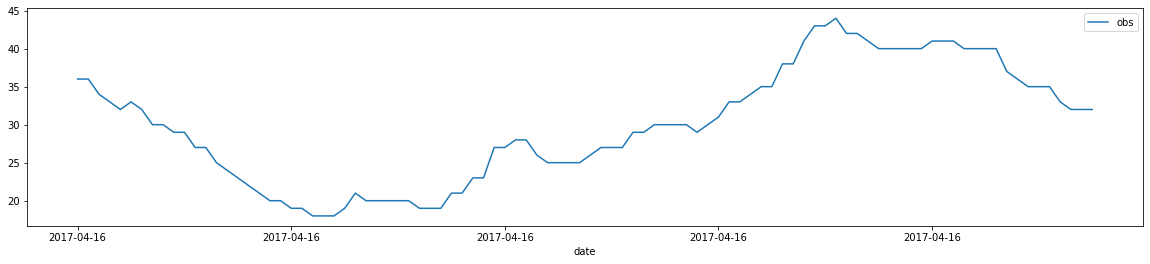

('486-1252', '2017-04-17')


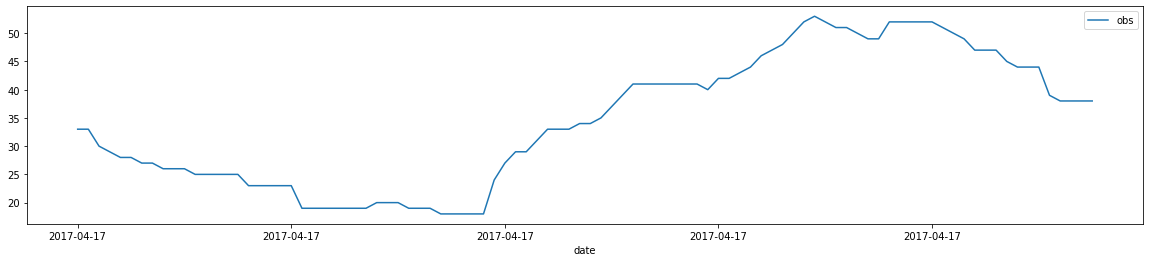

('486-1252', '2017-04-18')


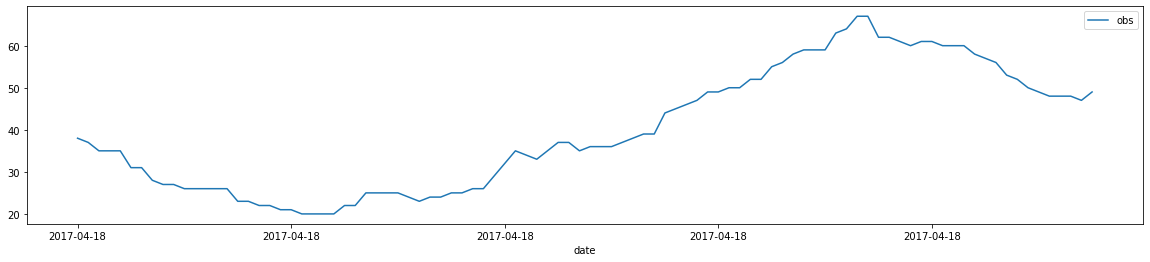

('486-1252', '2017-04-19')


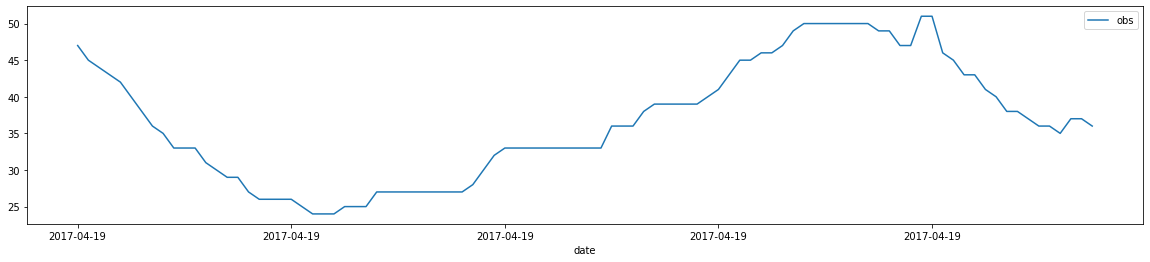

('486-1252', '2017-04-20')


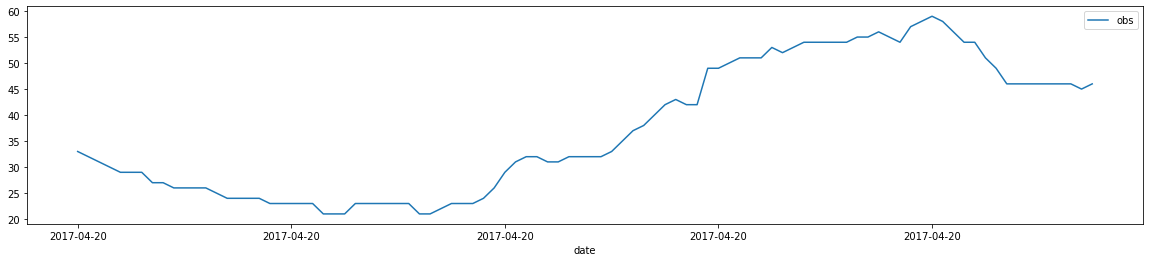

('486-1252', '2017-04-21')


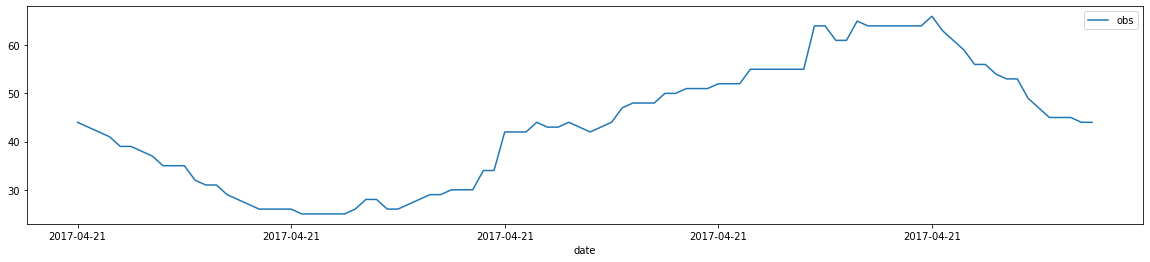

('486-1252', '2017-04-22')


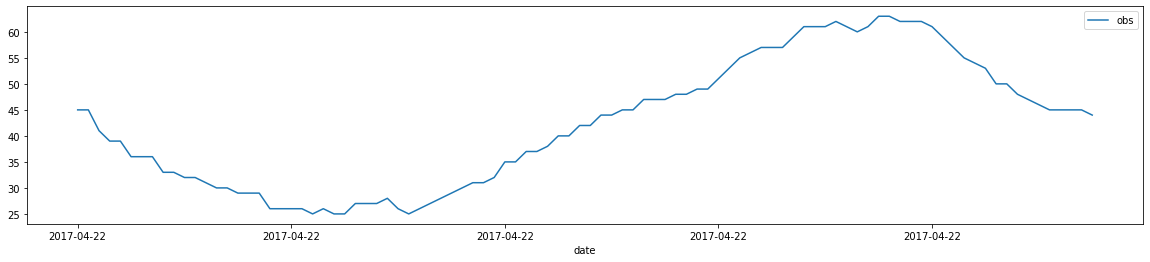

('486-1252', '2017-04-23')


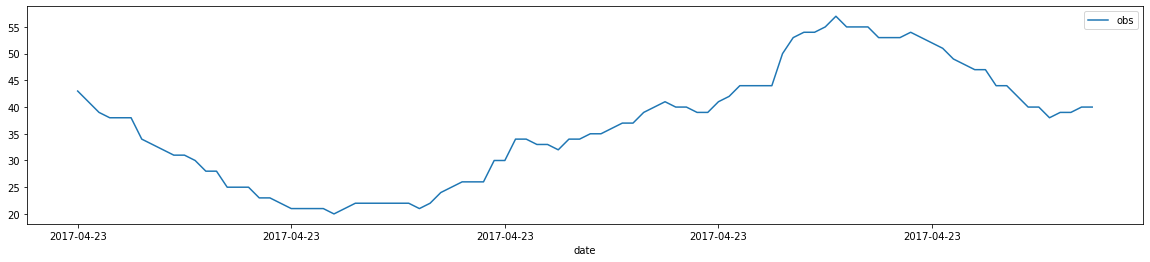

('486-1252', '2017-04-24')


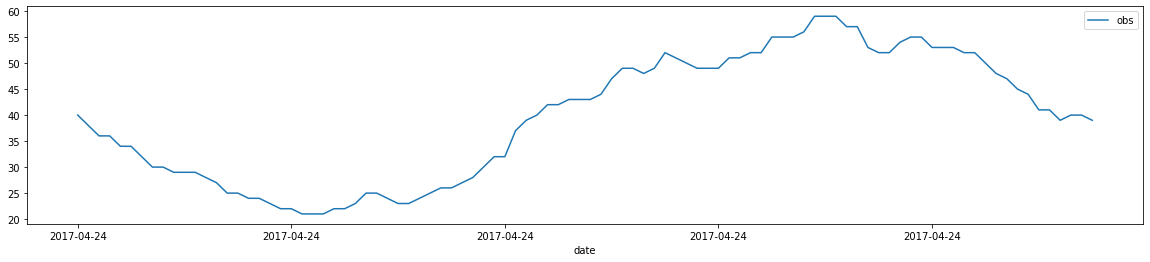

('486-1252', '2017-04-25')


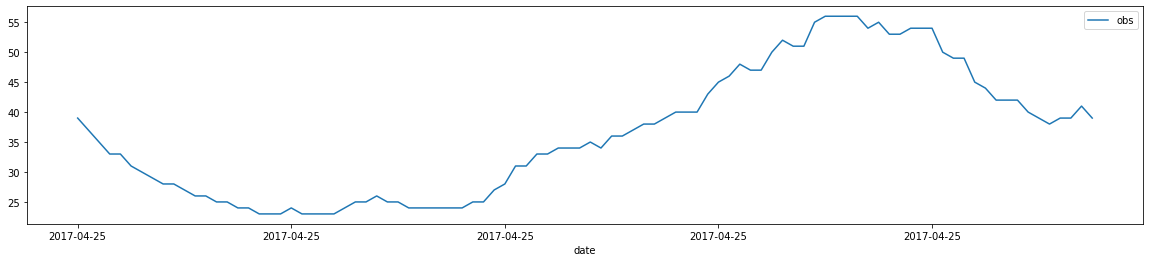

('486-1252', '2017-04-26')


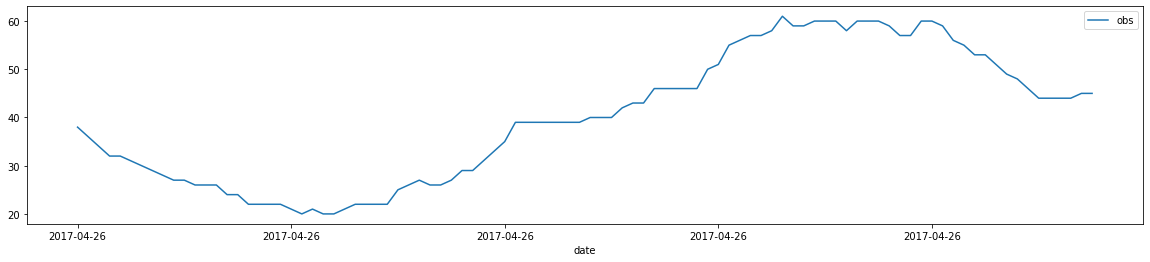

('486-1252', '2017-04-27')


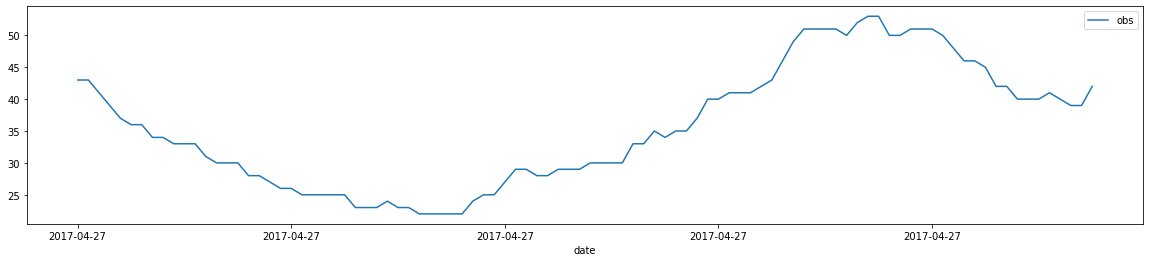

('486-1252', '2017-04-28')


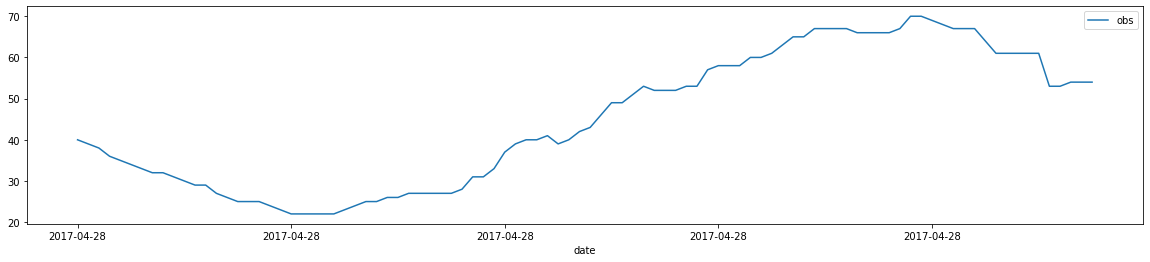

('486-1252', '2017-04-29')


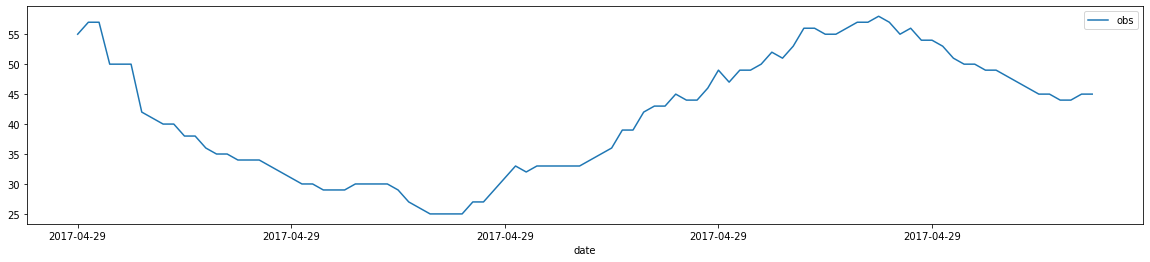

('486-1252', '2017-04-30')


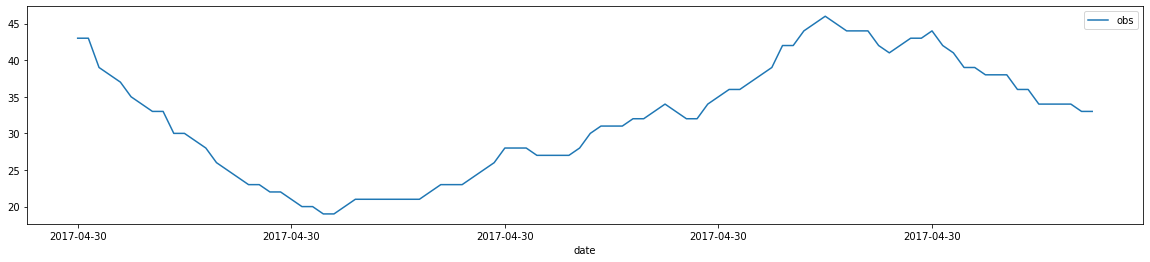

('486-1252', '2017-05-01')


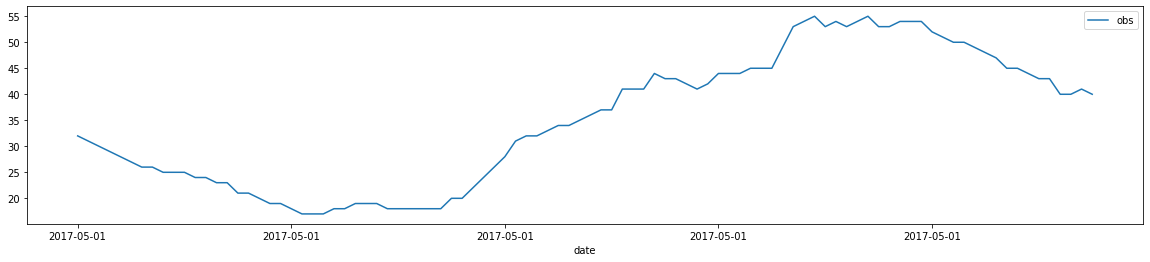

In [7]:
count = 0
for i, k in cell_date: 
    count +=1
   
    frame = { 'date': k.date, 'obs': k.nr_people } 
    k.set_index('date')
    print(i)
    result = pd.DataFrame(frame) 
    result = result.set_index('date')
    fig, ax = plt.subplots(figsize = (20, 4))
    result.plot(ax=ax)

    plt.show()
    if count > 15: 
        break

('486-1252', '2017-04-16')


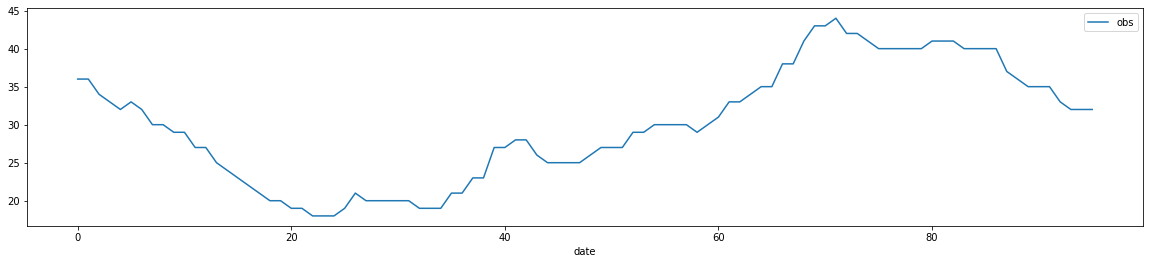

('486-1252', '2017-04-17')


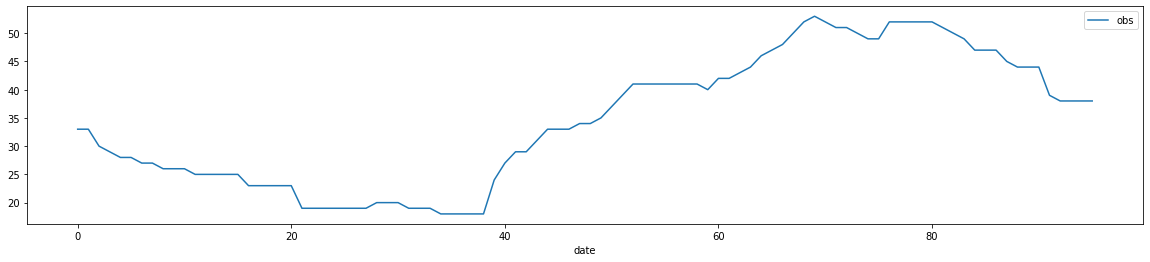

('486-1252', '2017-04-18')


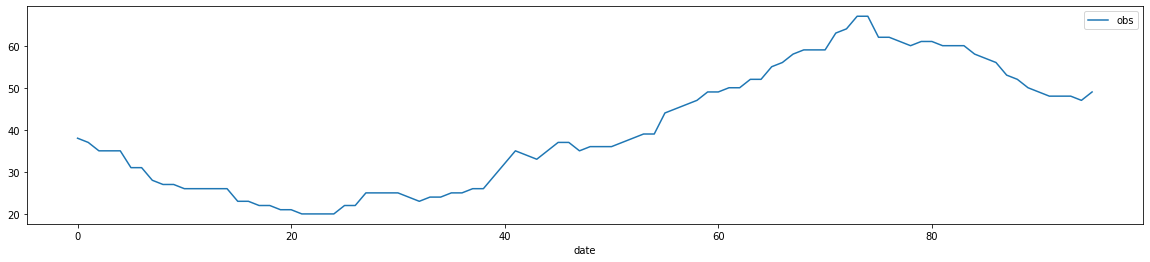

('486-1252', '2017-04-19')


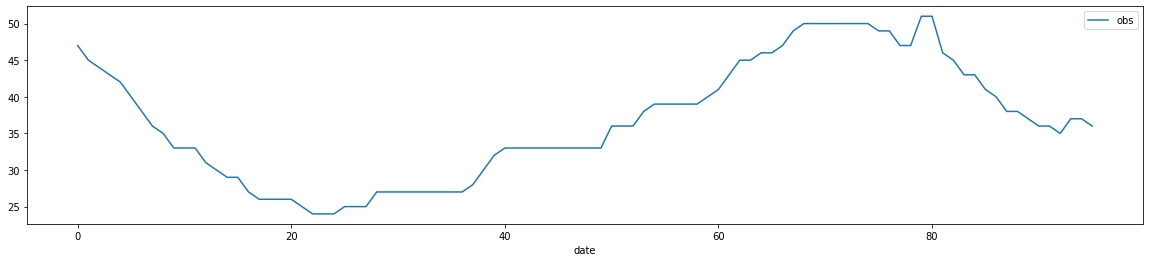

('486-1252', '2017-04-20')


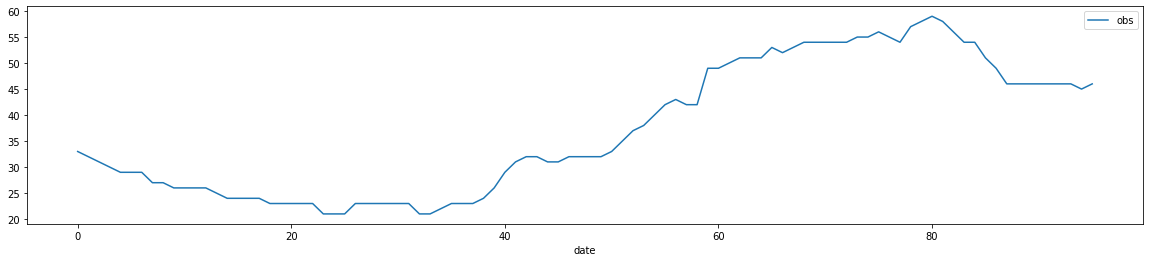

('486-1252', '2017-04-21')


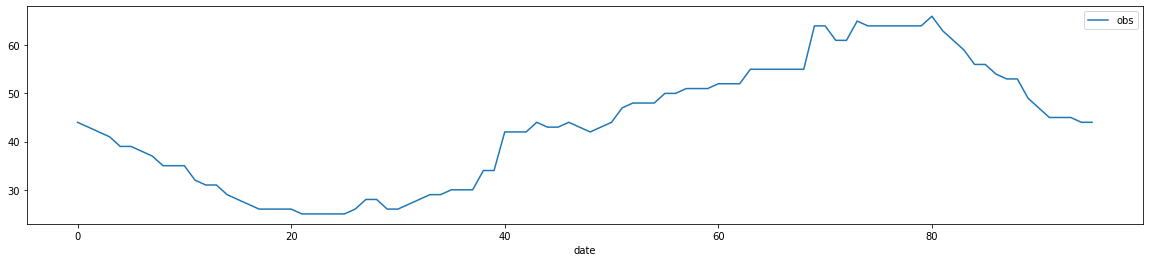

('486-1252', '2017-04-22')


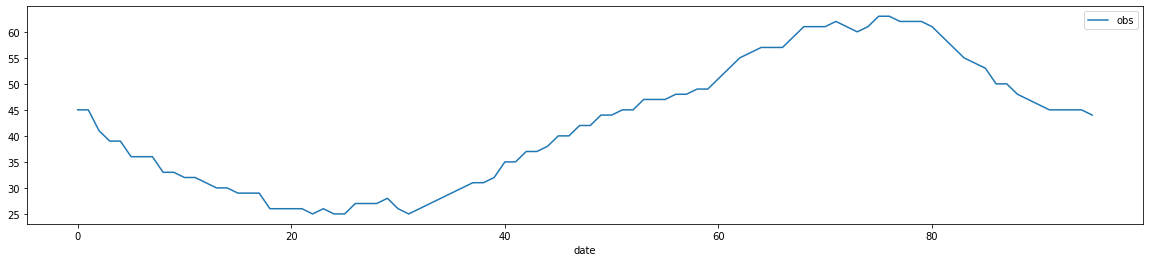

('486-1252', '2017-04-23')


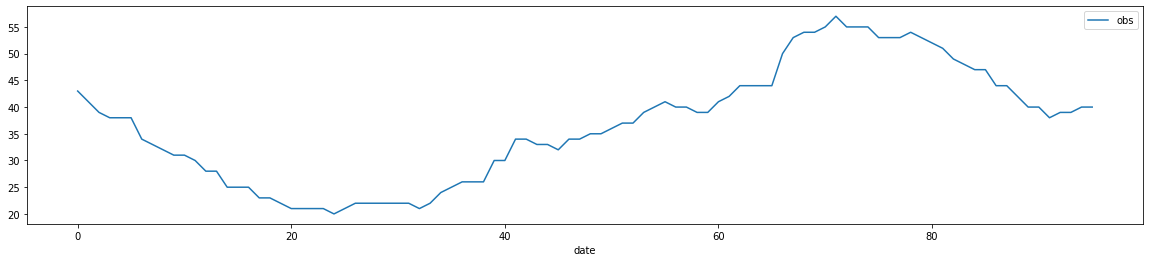

('486-1252', '2017-04-24')


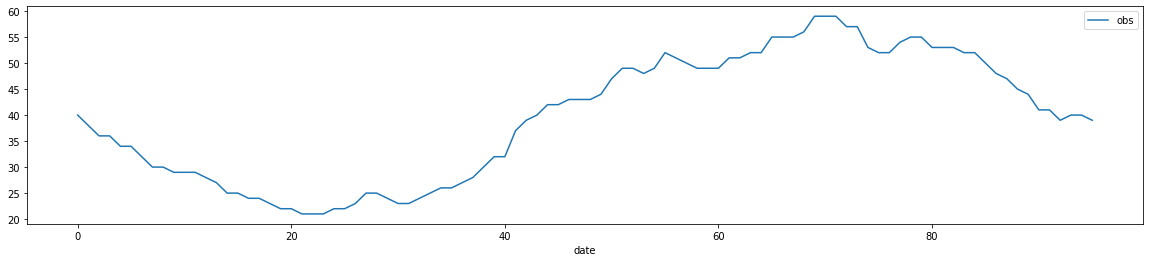

('486-1252', '2017-04-25')


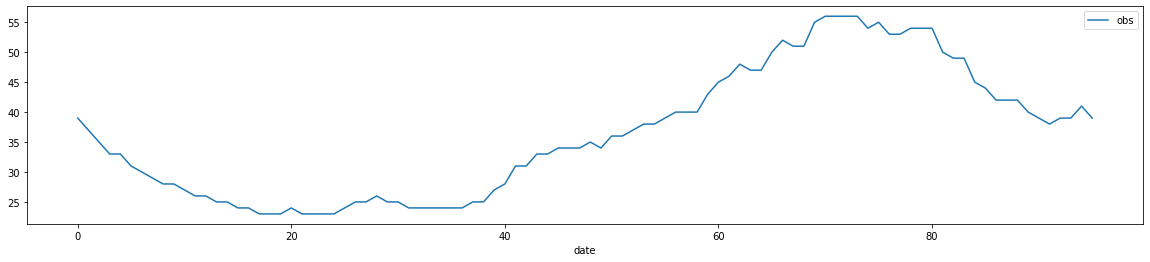

('486-1252', '2017-04-26')


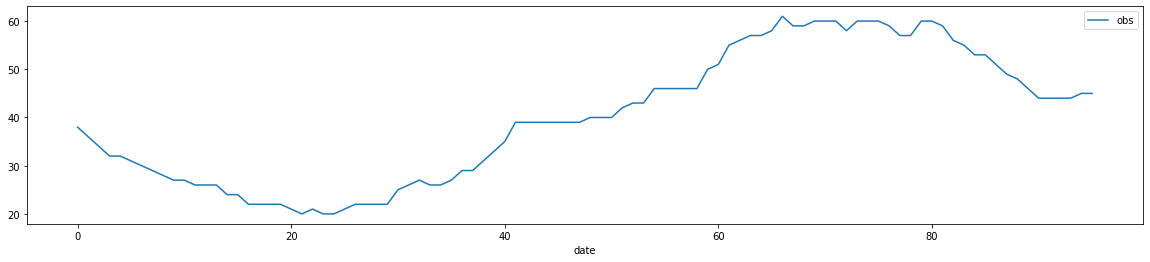

('486-1252', '2017-04-27')


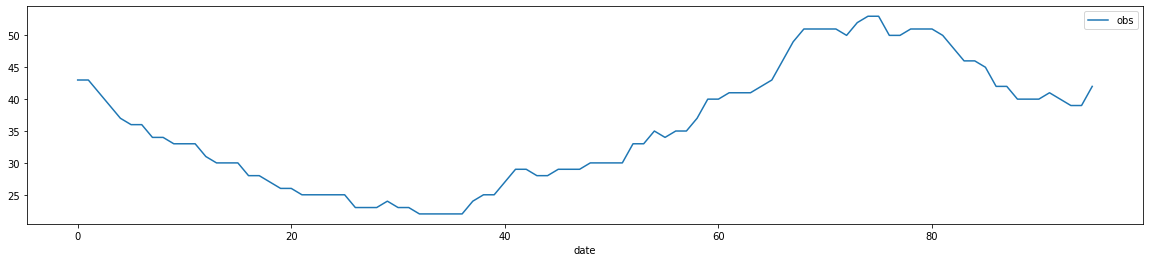

('486-1252', '2017-04-28')


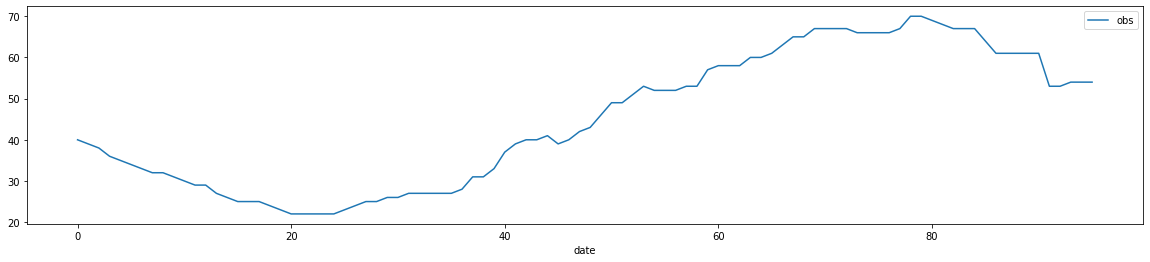

('486-1252', '2017-04-29')


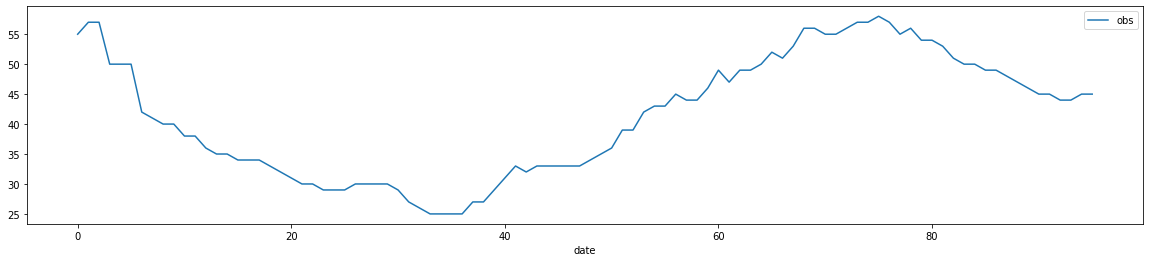

('486-1252', '2017-04-30')


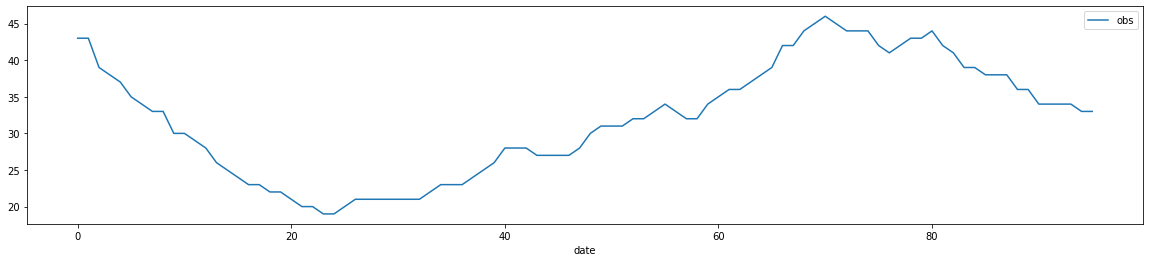

('486-1252', '2017-05-01')


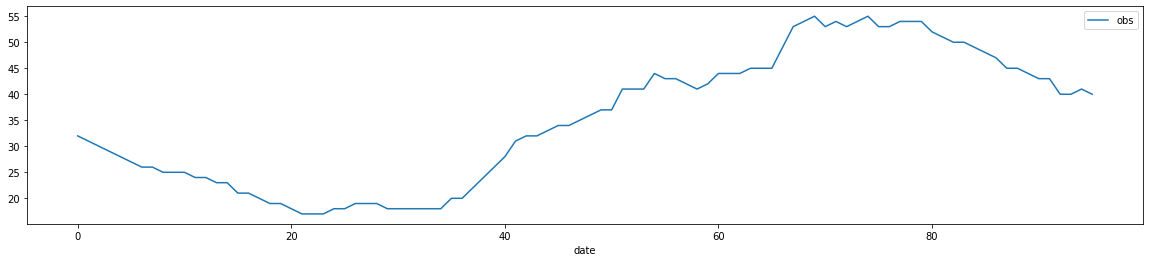

In [21]:
count = 0
for i, k in cell_date: 
    count +=1
   
    frame = { 'date': range(0, 96), 'obs': k.nr_people } 
    k.set_index('date')
    print(i)
    result = pd.DataFrame(frame) 
    result = result.set_index('date')
    fig, ax = plt.subplots(figsize = (20, 4))
    result.plot(ax=ax)

    plt.show()
    if count > 15: 
        break

In [734]:
# Da questo andamento periodico dei valori di attivita di cella, 
# si potrebbe dedurre anche l'ora nella quale è stata fatta l'osservazione ?? 

In [735]:
agg_by_date = data.groupby(by = ['date'])
print('GroupBy date = ',len(agg_by_date))
agg_by_cell = data.groupby(by = ['cell_num'])
print('GroupBy cell = ',len(agg_by_cell))

GroupBy date =  123
GroupBy cell =  1353


389-1015


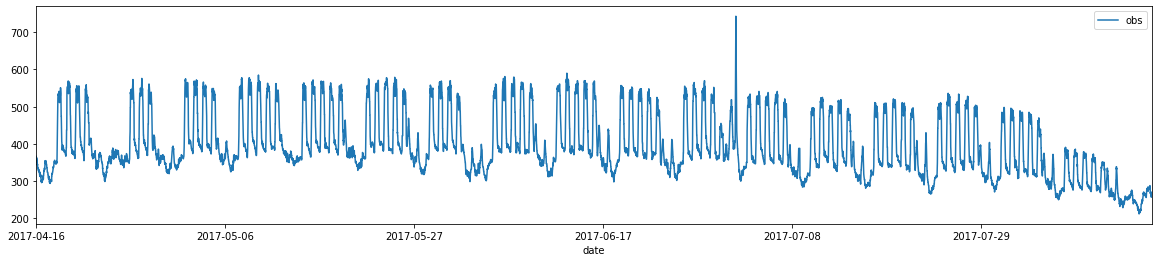

389-1016


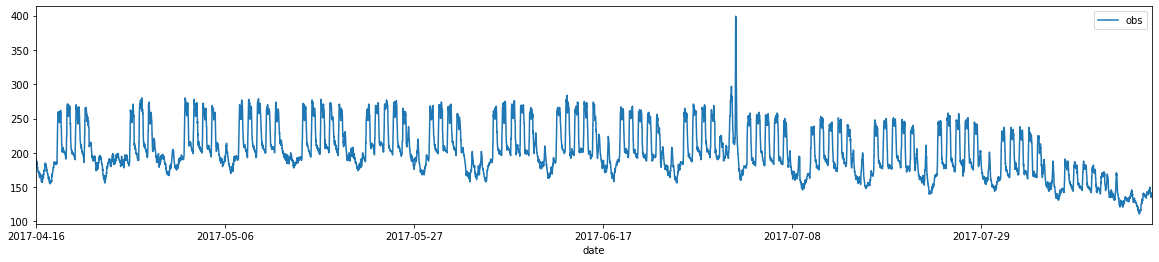

389-1017


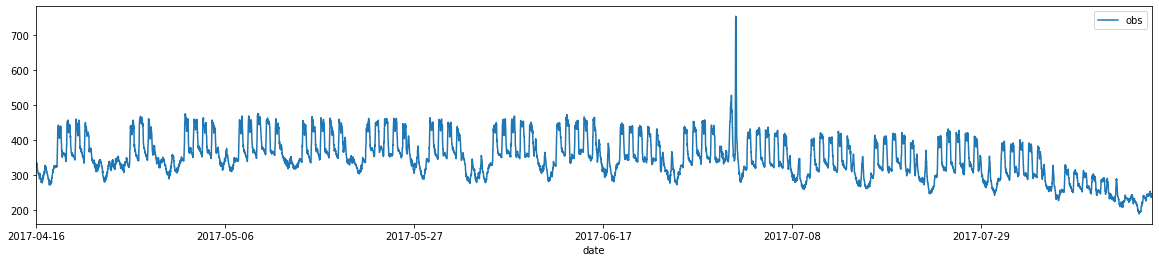

389-1018


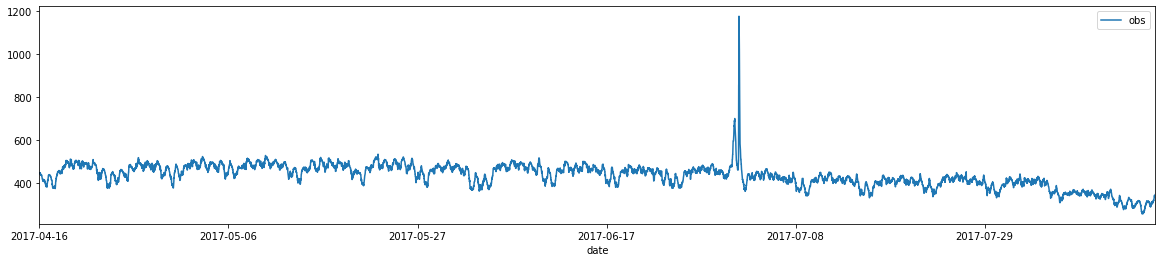

389-1019


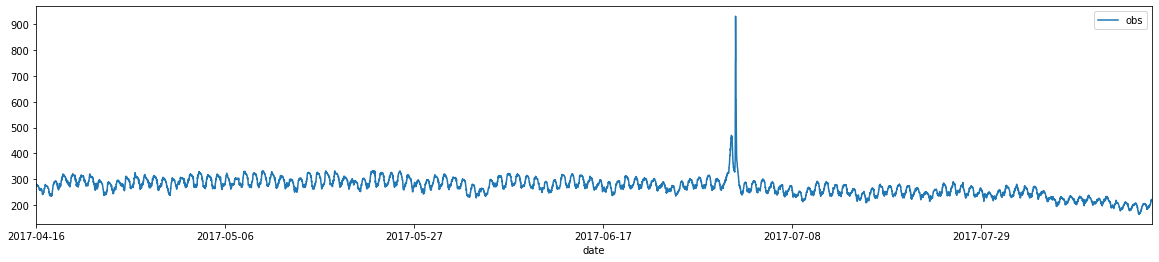

389-1020


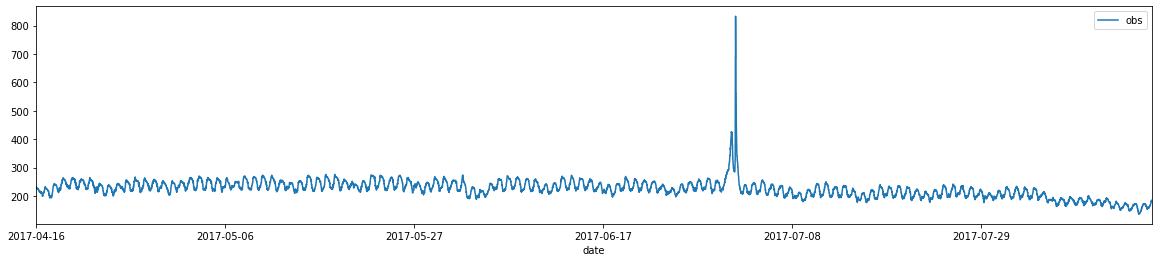

389-1021


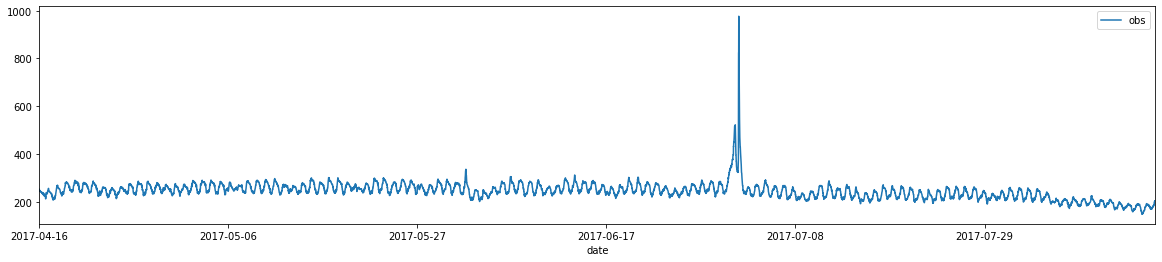

In [739]:
# grafico che mostra le osservazioni per tutte le celle con riferimento a una data 
count = 0
for i, k in agg_by_cell:
    
    frame = { 'date': k.date, 'obs': k.nr_people } 
    k.set_index('date')
    print(i)
    result = pd.DataFrame(frame) 
    result = result.set_index('date')
    fig, ax = plt.subplots(figsize = (20, 4))
    result.plot(ax=ax)
    
    count +=1
    #print(count, '------------------>>>')
    #k['nr_people'].plot(title='Cell '+i, figsize = (16, 4))
    plt.show()
    if count > 6:
        break

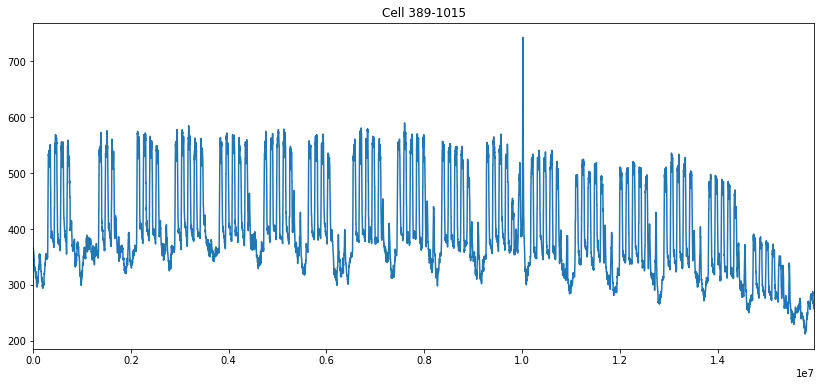

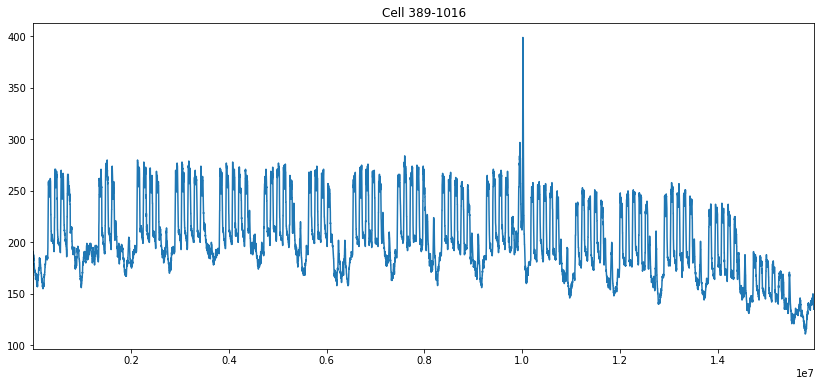

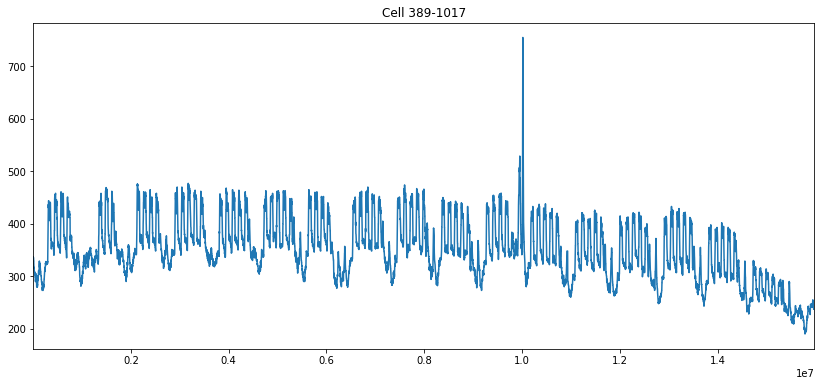

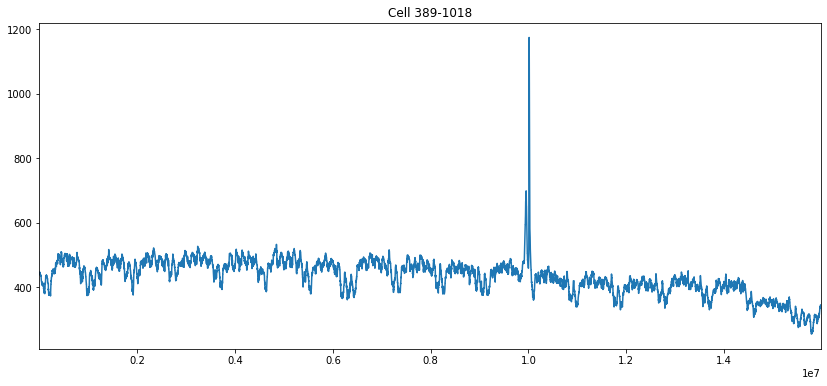

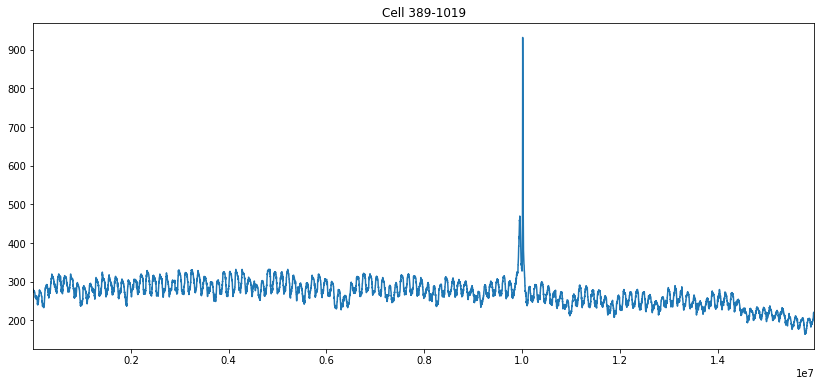

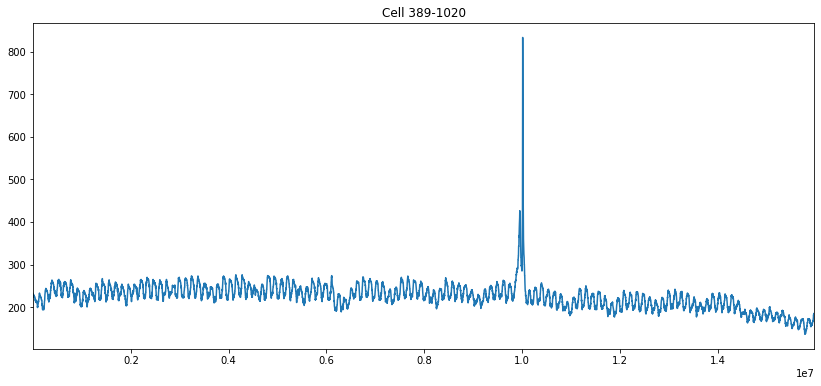

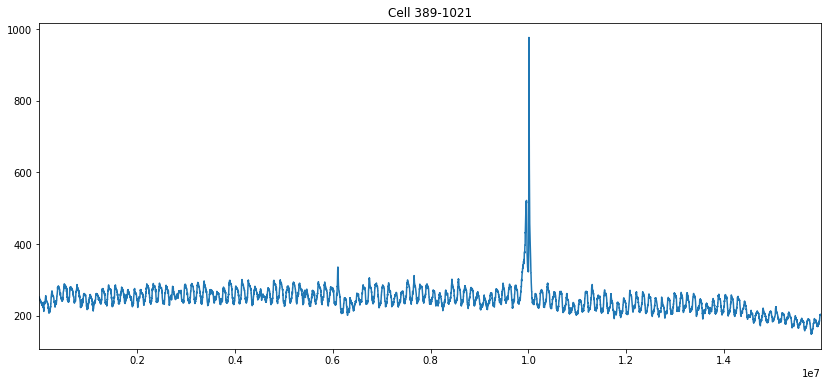

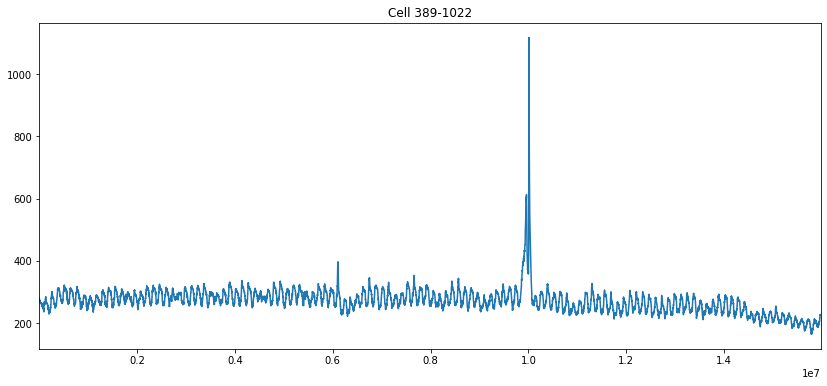

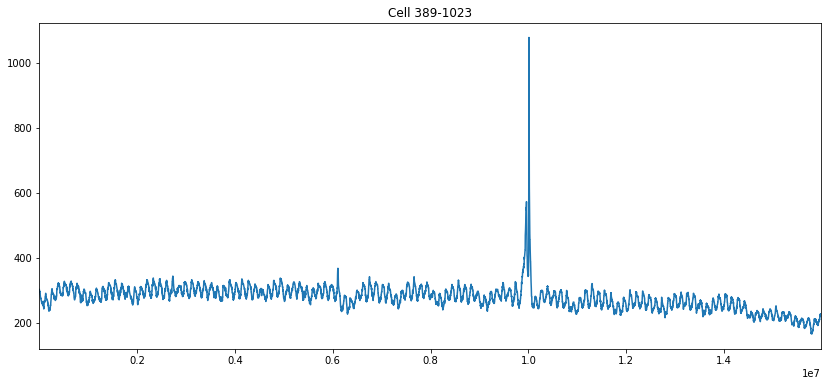

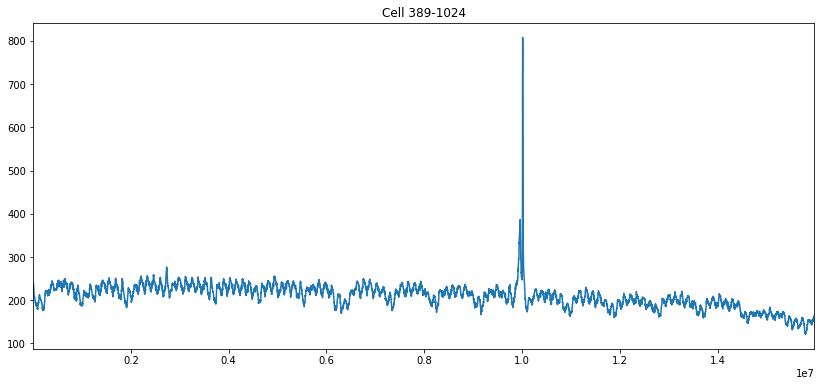

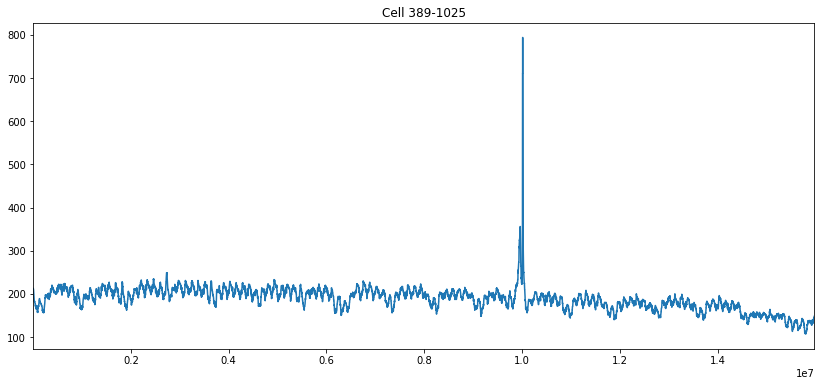

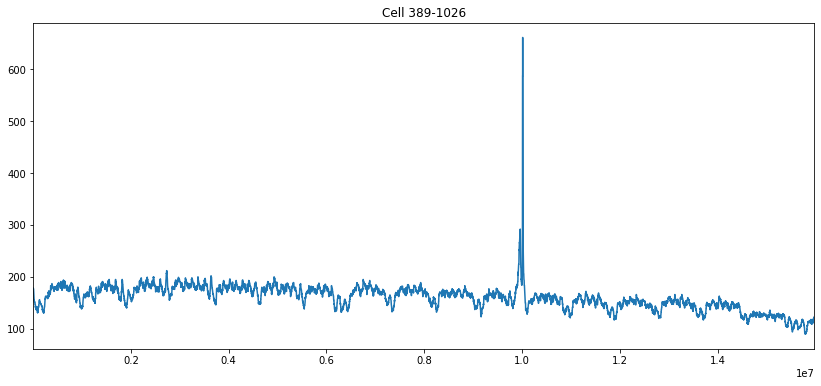

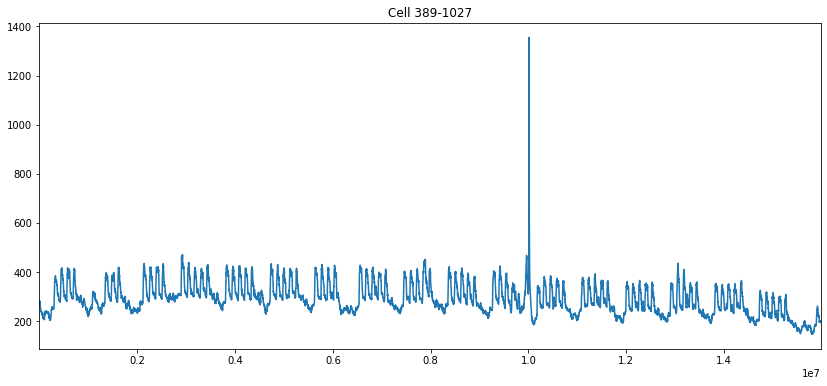

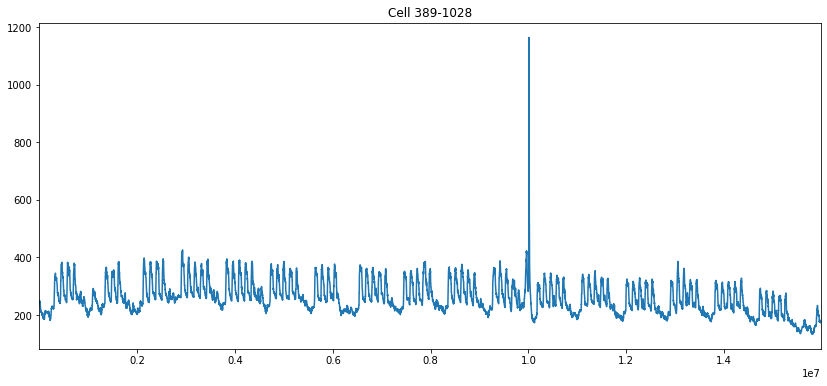

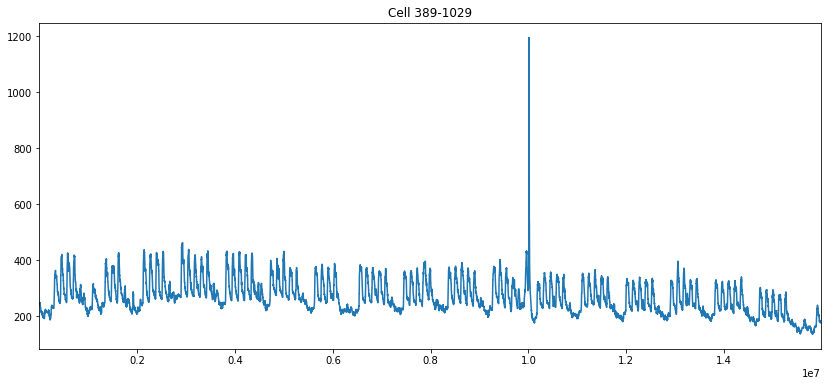

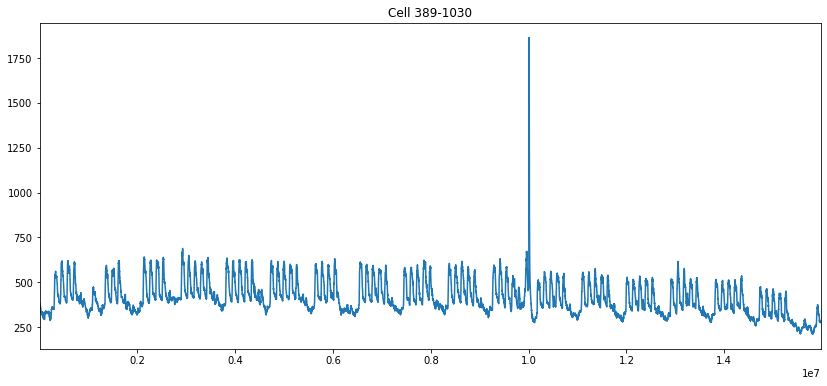

In [30]:
# grafico che mostra le osservazioni per tutte le date con riferimento a una data cella 
count = 0
for i, k in agg_by_cell: 
    k['nr_people'].plot(title='Cell '+i, figsize = (14, 6))
    plt.show()
    count += 1
    if count > 15:
        break
        
        

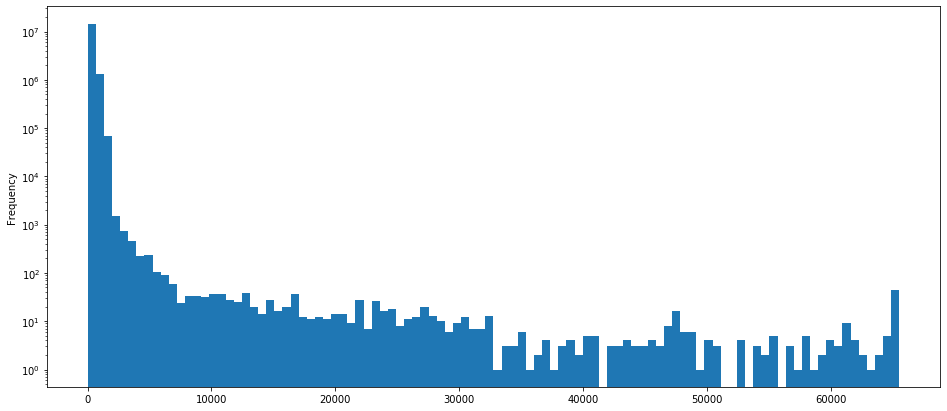

In [31]:
# histogramma della distribuzione dei valori cella (nr_persone) in scala logaritmica 
data['nr_people'].plot(kind = 'hist', figsize = (16, 7), bins = 100, log = True);

In [32]:
data

date  cell_num  nr_people  hours  minutes
0         2017-04-16  389-1015      361.0    0.0      0.0
1353      2017-04-16  389-1015      367.0    0.0     15.0
2706      2017-04-16  389-1015      359.0    0.0     30.0
4059      2017-04-16  389-1015      354.0    0.0     45.0
5412      2017-04-16  389-1015      350.0    1.0      0.0
...              ...       ...        ...    ...      ...
15970811  2017-08-16  421-1055       17.0   22.0     45.0
15972164  2017-08-16  421-1055       17.0   23.0      0.0
15973517  2017-08-16  421-1055       17.0   23.0     15.0
15974870  2017-08-16  421-1055       18.0   23.0     30.0
15976223  2017-08-16  421-1055       18.0   23.0     45.0

[15976224 rows x 5 columns]

In [33]:
# crea un campo 'is_business_day' con valore binario
business_day = []

def find_business_days(business_day):
    for i in data.date:
        #print(i)
        s = i.split('-')
        year = int(s[0])
       # print(year, '----------------_>>>>><')
        month = int(s[1])
        day = int(s[2])
    
        dayofweek = datetime.date(year, month, day).strftime("%A")
        if ((dayofweek == 'Saturday') | (dayofweek == 'Sunday')): 
            business_day.append(0)
        else: 
            business_day.append(1)
     
    return business_day

bd = find_business_days(business_day)
data['is_business_day']= bd  


In [34]:
# crea una feature media 'mean' 
d_cell = {}
for i, k in agg_by_cell: 
    #print(i, k)
    d_cell[i] = int(k['nr_people'].mean())  
    
val = []

for i in data['cell_num']:
    val_i = d_cell.get(i)
    val.append(val_i)
        
data['mean']= val 
data 

date  cell_num  nr_people  hours  minutes  is_business_day  \
0         2017-04-16  389-1015      361.0    0.0      0.0                0   
1353      2017-04-16  389-1015      367.0    0.0     15.0                0   
2706      2017-04-16  389-1015      359.0    0.0     30.0                0   
4059      2017-04-16  389-1015      354.0    0.0     45.0                0   
5412      2017-04-16  389-1015      350.0    1.0      0.0                0   
...              ...       ...        ...    ...      ...              ...   
15970811  2017-08-16  421-1055       17.0   22.0     45.0                1   
15972164  2017-08-16  421-1055       17.0   23.0      0.0                1   
15973517  2017-08-16  421-1055       17.0   23.0     15.0                1   
15974870  2017-08-16  421-1055       18.0   23.0     30.0                1   
15976223  2017-08-16  421-1055       18.0   23.0     45.0                1   

          mean  
0          396  
1353       396  
2706       396  
4059       396  
5412       396  
...        ...  
15970811    22  
15972164    22  
15973517    22  
15974870    22  
15976223    22  

[15976224 rows x 7 columns]

In [35]:
business_h = []
def find_business_hours(business_h):
    for i in data['hours']:
        if i > 8 and i < 21 :
            business_h.append(1)
        
        else:
            business_h.append(0)
    return business_h  

business_h = find_business_hours(business_h)        
data['is_business_hour'] = business_h

In [36]:
data

date  cell_num  nr_people  hours  minutes  is_business_day  \
0         2017-04-16  389-1015      361.0    0.0      0.0                0   
1353      2017-04-16  389-1015      367.0    0.0     15.0                0   
2706      2017-04-16  389-1015      359.0    0.0     30.0                0   
4059      2017-04-16  389-1015      354.0    0.0     45.0                0   
5412      2017-04-16  389-1015      350.0    1.0      0.0                0   
...              ...       ...        ...    ...      ...              ...   
15970811  2017-08-16  421-1055       17.0   22.0     45.0                1   
15972164  2017-08-16  421-1055       17.0   23.0      0.0                1   
15973517  2017-08-16  421-1055       17.0   23.0     15.0                1   
15974870  2017-08-16  421-1055       18.0   23.0     30.0                1   
15976223  2017-08-16  421-1055       18.0   23.0     45.0                1   

          mean  is_business_hour  
0          396                 0  
1353       396                 0  
2706       396                 0  
4059       396                 0  
5412       396                 0  
...        ...               ...  
15970811    22                 0  
15972164    22                 0  
15973517    22                 0  
15974870    22                 0  
15976223    22                 0  

[15976224 rows x 8 columns]

In [37]:
# trova le osservazioni fatte nei giorni lavorativi e negli weekend 
business_days = data[data['is_business_day']==1]
weekends = data[data['is_business_day']==0]
bd = business_days['nr_people'].to_numpy()
wd = weekends['nr_people'].to_numpy()

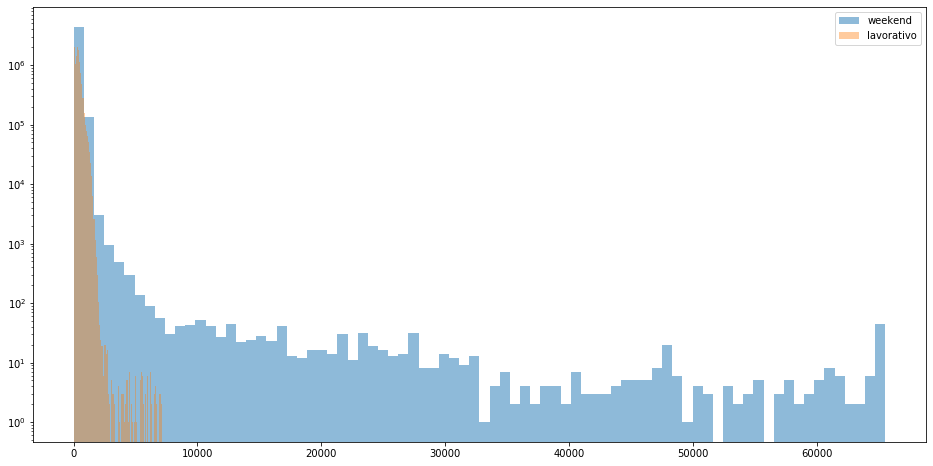

In [38]:
plt.figure(figsize=(16,8))
plt.hist(wd, 80, alpha= 0.5, label = 'weekend', log = True)
plt.hist(bd, 80, alpha= 0.4, label = 'lavorativo', log = True)

plt.legend(loc='upper right')
plt.show()

In [39]:
# grafici geopandas per visualizzare la griglia

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [121]:
geo_df = gpd.read_file('/Users/alket/Desktop/dati/shp/Modena.shp')
geo_df.head(10)

SP_ID  val                                           geometry
0  390-1016  0.0  POLYGON ((10.88833 44.65542, 10.88833 44.65667...
1  390-1017  0.0  POLYGON ((10.89000 44.65542, 10.89000 44.65667...
2  390-1018  0.0  POLYGON ((10.89167 44.65542, 10.89167 44.65667...
3  390-1019  0.0  POLYGON ((10.89333 44.65542, 10.89333 44.65667...
4  390-1020  0.0  POLYGON ((10.89500 44.65542, 10.89500 44.65667...
5  390-1021  0.0  POLYGON ((10.89667 44.65542, 10.89667 44.65667...
6  390-1022  0.0  POLYGON ((10.89833 44.65542, 10.89833 44.65667...
7  390-1023  0.0  POLYGON ((10.90000 44.65542, 10.90000 44.65667...
8  390-1024  0.0  POLYGON ((10.90167 44.65542, 10.90167 44.65667...
9  390-1025  0.0  POLYGON ((10.90333 44.65542, 10.90333 44.65667...

In [122]:
locations_2 = []
loc_in = []
loc = []

for i in geo_df.geometry:
 
    stringa = str(i)
    coord = stringa[10:]
    coord = coord[:-2]
    #print(coord)
    co1 = coord.split(',')
    for j in co1:
        j = j.strip()
        co_0 = j.split(' ')
        #print(co_0)
        loc_in.append(float(co_0[1].strip()))
        loc_in.append(float(co_0[0].strip()))
        loc.append(loc_in)
        loc_in = []
    locations_2.append(loc)
    loc = []
    
print(locations_2)

[[[44.65541659725, 10.8883336429], [44.65666659735, 10.8883336429], [44.65666659735, 10.8900003097], [44.65541659725, 10.8900003097], [44.65541659725, 10.8883336429]], [[44.65541659725, 10.8900003097], [44.65666659735, 10.8900003097], [44.65666659735, 10.8916669765], [44.65541659725, 10.8916669765], [44.65541659725, 10.8900003097]], [[44.65541659725, 10.8916669765], [44.65666659735, 10.8916669765], [44.65666659735, 10.8933336433], [44.65541659725, 10.8933336433], [44.65541659725, 10.8916669765]], [[44.65541659725, 10.8933336433], [44.65666659735, 10.8933336433], [44.65666659735, 10.8950003101], [44.65541659725, 10.8950003101], [44.65541659725, 10.8933336433]], [[44.65541659725, 10.8950003101], [44.65666659735, 10.8950003101], [44.65666659735, 10.8966669769], [44.65541659725, 10.8966669769], [44.65541659725, 10.8950003101]], [[44.65541659725, 10.8966669769], [44.65666659735, 10.8966669769], [44.65666659735, 10.8983336437], [44.65541659725, 10.8983336437], [44.65541659725, 10.8966669769]

In [123]:
cells = geo_df['SP_ID'].tolist()
print(len(cells))

1353


In [124]:
data2 = data.sample(1353)
data2

date  cell_num  nr_people  hours  minutes  is_business_day  \
9518101   2017-06-28  415-1048      373.0    6.0     30.0                1   
13458334  2017-07-28  390-1017      204.0   14.0     45.0                1   
10686714  2017-07-07  406-1038      458.0    6.0     30.0                1   
15253253  2017-08-11  410-1038      426.0   10.0     15.0                1   
504742    2017-04-19  390-1047      259.0   21.0     15.0                1   
...              ...       ...        ...    ...      ...              ...   
10425119  2017-07-05  395-1023      377.0    6.0     15.0                1   
13528384  2017-07-29  415-1039      286.0    3.0     30.0                0   
8855686   2017-06-23  396-1029      436.0    4.0     15.0                1   
7986375   2017-06-16  412-1041       24.0   11.0     30.0                1   
13856748  2017-07-31  405-1034      359.0   16.0     15.0                1   

          mean  is_business_hour  
9518101    345                 0  
13458334   171                 1  
10686714   429                 0  
15253253   470                 1  
504742     229                 0  
...        ...               ...  
10425119   395                 0  
13528384   302                 0  
8855686    638                 0  
7986375     26                 1  
13856748   409                 1  

[1353 rows x 8 columns]

In [125]:
mean2cell = data2['mean'].tolist()
minn = min(mean2cell)
maxx = max(mean2cell)
normalized = []
count = 0
for i in mean2cell: 
    #print(type(i)) 
    #count +=1
    
    rounded = round((i-minn)/(maxx-minn),3)    
    normalized.append(rounded)
                      
normalized[0:10]        

[0.272, 0.133, 0.34, 0.373, 0.179, 0.043, 0.157, 0.165, 0.295, 0.008]

In [126]:
print(len(cells), ' > ', len(normalized))

1353  >  1353


In [127]:
air = folium.Map(location = [44.6568, 10.9202], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i in locations_2:
    folium.Polygon(locations = locations_2[count], color='blue', weight=1, fill_color='red', 
                   fill_opacity=normalized[count_norm]-0.1,
                   fill=True, tooltip='Cell = '+cells[count]
    ).add_to(air)
    
    count +=1
    count_norm +=1
display(air)

In [28]:
### Aggrega dati per l''heatmap

In [95]:
air = folium.Map(location = [44.6568, 10.9202], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i in locations_2:
    folium.Polygon(locations = locations_2[count], color='blue', weight=1, fill_color='red').add_to(air)
    
    count +=1
    count_norm +=1
display(air)

In [96]:
cell_hour = data.groupby(['cell_num','hours'])
print(len(cell_hour))

32472


In [722]:
counter = 0
cell2hour = {}
cells = []
for i, k in cell_hour: 
    #print(i, k)
    counter +=1
    #if counter > 53 : break
    cell = i[0]
    hour = i[1]
    mean = round(k['nr_people'].quantile(0.15),1)
    
    #mean = round(k['nr_people'].values[45],2)
    
    t = (hour, mean)
    cells.append(t)
    if (counter % 24) == 0: 
        cell2hour[cell]= cells
        cells = []
cell2hour        

{'389-1015': [(0.0, 337.0),
  (1.0, 337.0),
  (2.0, 335.0),
  (3.0, 331.0),
  (4.0, 321.0),
  (5.0, 314.0),
  (6.0, 313.0),
  (7.0, 319.0),
  (8.0, 323.6),
  (9.0, 318.0),
  (10.0, 319.0),
  (11.0, 318.0),
  (12.0, 316.0),
  (13.0, 311.0),
  (14.0, 306.6),
  (15.0, 307.0),
  (16.0, 314.0),
  (17.0, 316.6),
  (18.0, 318.0),
  (19.0, 311.6),
  (20.0, 310.6),
  (21.0, 313.6),
  (22.0, 325.6),
  (23.0, 332.0)],
 '389-1016': [(0.0, 178.0),
  (1.0, 179.0),
  (2.0, 177.0),
  (3.0, 173.0),
  (4.0, 168.0),
  (5.0, 165.6),
  (6.0, 164.6),
  (7.0, 166.0),
  (8.0, 167.0),
  (9.0, 165.0),
  (10.0, 166.0),
  (11.0, 165.0),
  (12.0, 165.0),
  (13.0, 162.0),
  (14.0, 160.0),
  (15.0, 160.6),
  (16.0, 164.6),
  (17.0, 166.0),
  (18.0, 165.0),
  (19.0, 162.3),
  (20.0, 163.0),
  (21.0, 163.6),
  (22.0, 169.0),
  (23.0, 173.0)],
 '389-1017': [(0.0, 314.0),
  (1.0, 317.0),
  (2.0, 313.0),
  (3.0, 305.0),
  (4.0, 297.0),
  (5.0, 293.3),
  (6.0, 292.0),
  (7.0, 293.0),
  (8.0, 291.6),
  (9.0, 290.6),
  (10.

In [723]:
media_per_cell_hour10 = {}
media = []
for k, v in cell2hour.items(): 
    hours_cell_i = cell2hour[k]
    
    for i in hours_cell_i:
        if(i[0]== 12.0):
            media_per_cell_hour10[k] = i[1]

In [724]:
vals = list(media_per_cell_hour10.values())
max_x = max(vals)
min_x = min(vals)
print(max_x)
print(min_x)

1222.0
6.0


In [725]:
normalized_dict_hour10 = {}
for k, v in media_per_cell_hour10.items(): 
    val_i = media_per_cell_hour10[k]
    norm_i = round((val_i - min_x) / (max_x - min_x),3)
    print(val_i, norm_i)
    normalized_dict_hour10[str(k)] = norm_i

316.0 0.255
165.0 0.131
287.6 0.232
365.6 0.296
227.0 0.182
188.0 0.15
201.6 0.161
222.0 0.178
230.0 0.184
172.0 0.137
153.0 0.121
129.6 0.102
239.6 0.192
214.0 0.171
222.0 0.178
339.6 0.274
285.0 0.229
284.6 0.229
177.0 0.141
135.0 0.106
194.6 0.155
582.9 0.474
542.3 0.441
190.0 0.151
210.6 0.168
235.0 0.188
231.6 0.186
287.6 0.232
463.3 0.376
288.6 0.232
285.0 0.229
180.6 0.144
191.0 0.152
191.0 0.152
216.0 0.173
202.0 0.161
218.0 0.174
210.0 0.168
216.0 0.173
243.6 0.195
280.6 0.226
100.0 0.077
160.0 0.127
138.0 0.109
162.0 0.128
146.0 0.115
185.0 0.147
201.6 0.161
239.0 0.192
247.0 0.198
219.6 0.176
166.6 0.132
260.0 0.209
322.6 0.26
271.6 0.218
203.6 0.162
170.6 0.135
216.6 0.173
257.6 0.207
370.0 0.299
95.6 0.074
171.0 0.136
168.0 0.133
369.3 0.299
414.0 0.336
248.0 0.199
310.6 0.25
226.6 0.181
202.0 0.161
269.6 0.217
273.0 0.22
256.0 0.206
196.0 0.156
181.0 0.144
189.6 0.151
203.0 0.162
269.0 0.216
206.0 0.164
264.0 0.212
232.0 0.186
217.6 0.174
198.6 0.158
123.0 0.096
139.0 0.1

227.0 0.182
223.6 0.179
223.0 0.178
224.0 0.179
84.0 0.064
48.0 0.035
31.0 0.021
51.0 0.037
185.0 0.147
207.0 0.165
249.0 0.2
315.0 0.254
283.0 0.228
298.0 0.24
268.0 0.215
273.6 0.22
231.6 0.186
243.6 0.195
159.0 0.126
23.0 0.014
13.0 0.006
78.6 0.06
83.0 0.063
21.0 0.012
140.0 0.11
126.0 0.099
12.0 0.005
20.0 0.012
127.0 0.1
351.0 0.284
227.0 0.182
245.6 0.197
227.0 0.182
74.6 0.056
24.0 0.015
193.0 0.154
247.0 0.198
256.0 0.206
238.0 0.191
261.6 0.21
259.6 0.209
261.0 0.21
303.6 0.245
343.0 0.277
243.0 0.195
261.0 0.21
237.0 0.19
79.0 0.06
27.0 0.017
54.0 0.039
62.0 0.046
169.0 0.134
289.0 0.233
302.0 0.243
293.0 0.236
278.0 0.224
240.0 0.192
316.3 0.255
311.3 0.251
22.0 0.013
21.0 0.012
15.0 0.007
69.0 0.052
77.0 0.058
98.0 0.076
146.0 0.115
24.0 0.015
49.6 0.036
23.0 0.014
40.0 0.028
135.0 0.106
213.6 0.171
198.0 0.158
42.0 0.03
21.0 0.012
21.0 0.012
155.0 0.123
222.0 0.178
215.0 0.172
233.0 0.187
286.0 0.23
281.0 0.226
286.0 0.23
322.0 0.26
315.0 0.254
242.0 0.194
279.0 0.225
272

In [726]:
cells2locations = {}
locations_3 = []
loc3 = []
for i,row in geo_df.iterrows():
    cell_i = row['SP_ID']
    i = row['geometry']
    stringa = str(i)
    coord = stringa[10:]
    coord = coord[:-2]
    #print(coord)
    co1 = coord.split(',')
    for j in co1:
        j = j.strip()
        co_0 = j.split(' ')
        #print(co_0)
        loc_in.append(float(co_0[1].strip()))
        loc_in.append(float(co_0[0].strip()))
        loc3.append(loc_in)
        loc_in = []
    locations_3.append(loc3)
    cells2locations[cell_i] = loc3
    loc3 = []
    

In [727]:
air = folium.Map(width=1200,height=900, location = [44.6568, 10.9202], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i, k in cells2locations.items():
    try:
        folium.Polygon(locations = cells2locations[i], 
                   color='blue', weight=1, fill_color='red', 
                   fill_opacity=normalized_dict_hour10[i],
                   fill=True, 
                   tooltip='Cell = '+i+','+str(normalized_dict_hour10[i])
        ).add_to(air)
    except:
          'KeyError'

display(air)

In [728]:
air.save('index_random_h12_15.0.html')